# agentic search

In [1]:
# libraries
from dotenv import load_dotenv
import os
from tavily import TavilyClient

# load environment variables from .env file
_ = load_dotenv()

# connect
client = TavilyClient(api_key=os.environ.get("TAVILY_API_KEY"))

In [2]:
client

In [3]:
# run search
result = client.search("What is in Nvidia's new Blackwell GPU?",
                       include_answer=True)

# print the answer
result["answer"]

'The Nvidia Blackwell GPU is part of the RTX 50-series graphics cards and features the Blackwell architecture. The leaked specs include a GB202 model with 12*8 512-bit GDDR7 and a GB203 model with 7*6 256-bit configuration. The Blackwell platform aims to enable organizations to build and run real-time generative AI on trillion-parameter large language models at a significantly lower cost and energy consumption compared to its predecessor.'

In [4]:
result

{'query': "What is in Nvidia's new Blackwell GPU?",
 'follow_up_questions': None,
 'answer': 'The Nvidia Blackwell GPU is part of the RTX 50-series graphics cards and features the Blackwell architecture. The leaked specs include a GB202 model with 12*8 512-bit GDDR7 and a GB203 model with 7*6 256-bit configuration. The Blackwell platform aims to enable organizations to build and run real-time generative AI on trillion-parameter large language models at a significantly lower cost and energy consumption compared to its predecessor.',
 'images': None,
 'results': [{'title': 'Nvidia Blackwell and GeForce RTX 50-Series GPUs: Rumors, specifications ...',
   'url': 'https://www.tomshardware.com/pc-components/gpus/nvidia-blackwell-rtx-50-series-gpus-everything-we-know',
   'content': "Nvidia's Blackwell architecture is on the horizon, set to power the RTX 50-series graphics cards. ... That's a full decade of new Nvidia GPU architectures arriving approximately every two years ...",
   'score': 

# to mention the difference between regular search and agentic search 

# regular search 

In [11]:
# choose location (try to change to your own city!)

city = "Texas"

query = f"""
    what is the current weather in {city}?
    Should I travel there today?
    "weather.com"
"""

In [12]:
query

'\n    what is the current weather in Texas?\n    Should I travel there today?\n    "weather.com"\n'

In [13]:
import requests
from bs4 import BeautifulSoup
from duckduckgo_search import DDGS
import re

ddg = DDGS()

def search(query, max_results=6):
    try:
        results = ddg.text(query, max_results=max_results)
        print(f"printing the resuls in search function :{results}")
        return [i["href"] for i in results]
    except Exception as e:
        print(f"returning previous results due to exception reaching ddg.")
        results = [ # cover case where DDG rate limits due to high deeplearning.ai volume
            "https://weather.com/weather/today/l/USCA0987:1:US",
            "https://weather.com/weather/hourbyhour/l/54f9d8baac32496f6b5497b4bf7a277c3e2e6cc5625de69680e6169e7e38e9a8",
        ]
        return results  

In [14]:
for i in search(query):
    print(i)

printing the resuls in search function :[{'title': 'Weather Forecast and Conditions for Dallas, TX - The Weather Channel', 'href': 'https://weather.com/weather/today/l/e5fda0dddc6806ed04ea7bbc9cd98b8a10ad240e6ba81fae96f4ecf5e5a4d5b2', 'body': "Today's and tonight's Dallas, TX weather forecast, weather conditions and Doppler radar from The Weather Channel and Weather.com"}, {'title': 'Hurricane Beryl Forms: Major Caribbean Threat Ahead | Weather.com', 'href': 'https://weather.com/storms/hurricane/news/2024-06-28-tropical-storm-beryl-hurricane-caribbean', 'body': 'Beryl is now a hurricane located a few hundred miles east of the Caribbean. Beryl is likely to become a Category 3 hurricane before reaching the Windward Islands. After that, its future in the ...'}, {'title': '10-Day Weather Forecast for Texas - The Weather Channel | weather.com', 'href': 'https://weather.com/weather/tenday/l/f89ae3c0394d9636c6fb8a8292efd97c112bf7d4f68046c17bf4097083801920', 'body': 'Be prepared with the most 

# scraping weather 

In [15]:
def scrape_weather_info(url):
    """Scrape content from the given URL"""
    if not url:
        return "Weather information could not be found."
    
    # fetch data
    headers = {'User-Agent': 'Mozilla/5.0'}
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the webpage."

    # parse result
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup


In [16]:
# use DuckDuckGo to find websites and take the first result
url = search(query)[0]

# scrape first wesbsite
soup = scrape_weather_info(url)

print(f"Website: {url}\n\n")
print(str(soup.body)[:50000]) # limit long outputs

printing the resuls in search function :[{'title': 'Weather Forecast and Conditions for Dallas, TX - The Weather Channel', 'href': 'https://weather.com/weather/today/l/e5fda0dddc6806ed04ea7bbc9cd98b8a10ad240e6ba81fae96f4ecf5e5a4d5b2', 'body': "Today's and tonight's Dallas, TX weather forecast, weather conditions and Doppler radar from The Weather Channel and Weather.com"}, {'title': '10-Day Weather Forecast for Texas - The Weather Channel | weather.com', 'href': 'https://weather.com/weather/tenday/l/f89ae3c0394d9636c6fb8a8292efd97c112bf7d4f68046c17bf4097083801920', 'body': 'Be prepared with the most accurate 10-day forecast for Texas with highs, lows, chance of precipitation from The Weather Channel and Weather.com'}, {'title': 'Houston, TX Weather - The Weather Channel | Weather.com', 'href': 'https://weather.com/weather/hourbyhour/l/Houston+TX?canonicalCityId=964b8d191c29bb23fd320c802de9cde07e02d879f789c8764ed65f1a1ae951c9', 'body': 'Hourly Local Weather Forecast, weather conditions,

<!DOCTYPE html>
<html dir="ltr" lang="en-US"><head>
<meta charset="utf-8" data-react-helmet="true"/><meta content="width=device-width, initial-scale=1, viewport-fit=cover" data-react-helmet="true" name="viewport"/><meta content="max-image-preview:large" data-react-helmet="true" name="robots"/><meta content="index, follow" data-react-helmet="true" name="robots"/><meta content="origin" data-react-helmet="true" name="referrer"/><meta content="Today’s and tonight’s Dallas, TX weather forecast, weather conditions and Doppler radar from The Weather Channel and Weather.com" data-react-helmet="true" name="description"/><meta content="#ffffff" data-react-helmet="true" name="msapplication-TileColor"/><meta content="/daybreak-today/assets/ms-icon-144x144.d353af.png" data-react-helmet="true" name="msapplication-TileImage"/><meta content="#ffffff" data-react-helmet="true" name="theme-color"/><meta content="app-id=295646461" data-react-helmet="true" name="apple-itunes-app"/><meta content="Weather Fo
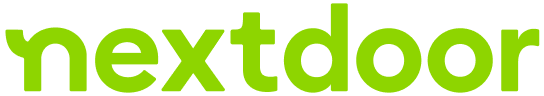

In [17]:
soup

In [18]:
# extract text
weather_data = []
for tag in soup.find_all(['h1', 'h2', 'h3', 'p']):
    text = tag.get_text(" ", strip=True)
    weather_data.append(text)
print(f"printing the weather_data :{weather_data}")

printing the weather_data :['recents', 'Specialty Forecasts', 'Dallas, TX', 'Heat Advisory', "Today's Forecast for Dallas, TX", 'Morning', 'Afternoon', 'Evening', 'Overnight', 'Weather Today in Dallas, TX', '6:22 am', '8:40 pm', "Don't Miss", 'Hourly Forecast', 'Now', '11 am', '12 pm', '1 pm', '2 pm', 'Outside', "That's Not What Was Expected", 'Daily Forecast', 'Today', 'Mon 01', 'Tue 02', 'Wed 03', 'Thu 04', 'Radar', 'We Love Our Critters', 'Inspire The Griller', 'Home, Garage & Garden', 'Beryl Tracker', 'Weather in your inbox', 'Your local forecast, plus daily trivia, stunning photos and our meteorologists’ top picks. All in one place, every weekday morning.', "By signing up, you're opting in to receive the Morning Brief email newsletter. To manage your data, visit Data Rights . Terms of Use | Privacy Policy", 'Health News For You', 'Become A Grill Master', 'Happening Near Dallas, TX', 'Popular Nextdoor posts', 'Stay Safe', 'Air Quality Index', 'Air quality is considered satisfactory

In [19]:

# combine all elements into a single string
weather_data = "\n".join(weather_data)

# remove all spaces from the combined text
weather_data = re.sub(r'\s+', ' ', weather_data)
    


In [20]:
print(f"Website: {url}\n\n")


Website: https://weather.com/weather/today/l/e5fda0dddc6806ed04ea7bbc9cd98b8a10ad240e6ba81fae96f4ecf5e5a4d5b2




In [21]:
print(weather_data)

recents Specialty Forecasts Dallas, TX Heat Advisory Today's Forecast for Dallas, TX Morning Afternoon Evening Overnight Weather Today in Dallas, TX 6:22 am 8:40 pm Don't Miss Hourly Forecast Now 11 am 12 pm 1 pm 2 pm Outside That's Not What Was Expected Daily Forecast Today Mon 01 Tue 02 Wed 03 Thu 04 Radar We Love Our Critters Inspire The Griller Home, Garage & Garden Beryl Tracker Weather in your inbox Your local forecast, plus daily trivia, stunning photos and our meteorologists’ top picks. All in one place, every weekday morning. By signing up, you're opting in to receive the Morning Brief email newsletter. To manage your data, visit Data Rights . Terms of Use | Privacy Policy Health News For You Become A Grill Master Happening Near Dallas, TX Popular Nextdoor posts Stay Safe Air Quality Index Air quality is considered satisfactory, and air pollution poses little or no risk. Health & Activities Seasonal Allergies and Pollen Count Forecast Grass pollen is high in your area Cold & F

## agentic search 

In [22]:
# run search
result = client.search(query, max_results=1)



In [23]:
result

{'query': '\n    what is the current weather in Texas?\n    Should I travel there today?\n    "weather.com"\n',
 'follow_up_questions': None,
 'answer': None,
 'images': None,
 'results': [{'title': 'Weather in Texas',
   'url': 'https://www.weatherapi.com/',
   'content': "{'location': {'name': 'Texas City', 'region': 'Texas', 'country': 'United States of America', 'lat': 29.38, 'lon': -94.9, 'tz_id': 'America/Chicago', 'localtime_epoch': 1719763423, 'localtime': '2024-06-30 11:03'}, 'current': {'last_updated_epoch': 1719763200, 'last_updated': '2024-06-30 11:00', 'temp_c': 30.6, 'temp_f': 87.1, 'is_day': 1, 'condition': {'text': 'Sunny', 'icon': '//cdn.weatherapi.com/weather/64x64/day/113.png', 'code': 1000}, 'wind_mph': 8.1, 'wind_kph': 13.0, 'wind_degree': 170, 'wind_dir': 'S', 'pressure_mb': 1021.0, 'pressure_in': 30.14, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 80, 'cloud': 0, 'feelslike_c': 35.7, 'feelslike_f': 96.2, 'windchill_c': 29.9, 'windchill_f': 85.8, 'heatindex_c':

In [24]:
# print first result
data = result["results"][0]["content"]



In [25]:
data

"{'location': {'name': 'Texas City', 'region': 'Texas', 'country': 'United States of America', 'lat': 29.38, 'lon': -94.9, 'tz_id': 'America/Chicago', 'localtime_epoch': 1719763423, 'localtime': '2024-06-30 11:03'}, 'current': {'last_updated_epoch': 1719763200, 'last_updated': '2024-06-30 11:00', 'temp_c': 30.6, 'temp_f': 87.1, 'is_day': 1, 'condition': {'text': 'Sunny', 'icon': '//cdn.weatherapi.com/weather/64x64/day/113.png', 'code': 1000}, 'wind_mph': 8.1, 'wind_kph': 13.0, 'wind_degree': 170, 'wind_dir': 'S', 'pressure_mb': 1021.0, 'pressure_in': 30.14, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 80, 'cloud': 0, 'feelslike_c': 35.7, 'feelslike_f': 96.2, 'windchill_c': 29.9, 'windchill_f': 85.8, 'heatindex_c': 34.1, 'heatindex_f': 93.4, 'dewpoint_c': 23.1, 'dewpoint_f': 73.5, 'vis_km': 16.0, 'vis_miles': 9.0, 'uv': 7.0, 'gust_mph': 12.6, 'gust_kph': 20.2}}"

In [26]:
print(data)

{'location': {'name': 'Texas City', 'region': 'Texas', 'country': 'United States of America', 'lat': 29.38, 'lon': -94.9, 'tz_id': 'America/Chicago', 'localtime_epoch': 1719763423, 'localtime': '2024-06-30 11:03'}, 'current': {'last_updated_epoch': 1719763200, 'last_updated': '2024-06-30 11:00', 'temp_c': 30.6, 'temp_f': 87.1, 'is_day': 1, 'condition': {'text': 'Sunny', 'icon': '//cdn.weatherapi.com/weather/64x64/day/113.png', 'code': 1000}, 'wind_mph': 8.1, 'wind_kph': 13.0, 'wind_degree': 170, 'wind_dir': 'S', 'pressure_mb': 1021.0, 'pressure_in': 30.14, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 80, 'cloud': 0, 'feelslike_c': 35.7, 'feelslike_f': 96.2, 'windchill_c': 29.9, 'windchill_f': 85.8, 'heatindex_c': 34.1, 'heatindex_f': 93.4, 'dewpoint_c': 23.1, 'dewpoint_f': 73.5, 'vis_km': 16.0, 'vis_miles': 9.0, 'uv': 7.0, 'gust_mph': 12.6, 'gust_kph': 20.2}}


In [27]:
import json
from pygments import highlight, lexers, formatters

# parse JSON
parsed_json = json.loads(data.replace("'", '"'))

# pretty print JSON with syntax highlighting
formatted_json = json.dumps(parsed_json, indent=4)
colorful_json = highlight(formatted_json,
                          lexers.JsonLexer(),
                          formatters.TerminalFormatter())

print(colorful_json)

{
    "location": {
        "name": "Texas City",
        "region": "Texas",
        "country": "United States of America",
        "lat": 29.38,
        "lon": -94.9,
        "tz_id": "America/Chicago",
        "localtime_epoch": 1719763423,
        "localtime": "2024-06-30 11:03"
    },
    "current": {
        "last_updated_epoch": 1719763200,
        "last_updated": "2024-06-30 11:00",
        "temp_c": 30.6,
        "temp_f": 87.1,
        "is_day": 1,
        "condition": {
            "text": "Sunny",
            "icon": "//cdn.weatherapi.com/weather/64x64/day/113.png",
            "code": 1000
        },
        "wind_mph": 8.1,
        "wind_kph": 13.0,
        "wind_degree": 170,
        "wind_dir": "S",
        "pressure_mb": 1021.0,
        "pressure_in": 30.14,
        "precip_mm": 0.0,
        "precip_in": 0.0,
        "humidity": 80,
        "cloud": 0,
        "feelslike_c": 35.7,
        "feelslike_f": 96.2,
        "windchill_c": 29.9,
        "windchill_f": 85.8,
   